<a href="https://colab.research.google.com/github/nenchiii/nenchiii/blob/main/cifar_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Classification Problem

🎯 **Exercise objectives**

* 1️⃣ Implement a CNN to solve a **`10-class classification problem`**

* 2️⃣ Enhance the CNN's performance with **`Data Augmentation Techniques`**

* 3️⃣ Experiment with **`GPUs to Accelerate Image Processing using Google Colab`**

<hr>


👏 You should now have a better feeling of:
* how CNNs works,
* and especially how convolutions scan images to detect specific spatial features.

🚀 It's time to play with images that are a bit more complex than the handwritten digits or the triangles/circles.

🎨 From [Wikipedia](https://en.wikipedia.org/wiki/CIFAR-10) (*click on the link for further information*):

> The **`CIFAR-10`** dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

<img src="https://people.minesparis.psl.eu/fabien.moutarde/ES_MachineLearning/mini-projets/cifar10_notebook_fichiers/cifar_10.png">

⭐️ This dataset is iconic in the research community as many enhancements for image recognition have been achieved on this dataset. After achieving great performance on this dataset, researchers moved to the more advanced CIFAR-100.

From the [University of Toronto](https://www.cs.toronto.edu/~kriz/cifar.html):

> This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).


🔥 In this notebook, let's ***implement a CNN to distinguish the 10 categories from the CIFAR-10 dataset***.

❗️ Again, remember that until 10 years ago, this problem was very challenging for the entire research community. As you have been sharpening your CNN skills, it is time to shine!

## 🛠 Google Colab Setup

If you are planning to use Google Colab (which is strongly recommended for this challenge), there is a few things you need to take care of first so that you can run everything properly.

* If you want to get started, follow these four steps.
* You can also read Davy's tutorial on Kitt 👉 [Introduction to Google Colab](https://kitt.lewagon.com/knowledge/tutorials/data_google_colab)

### Step 1: Upload the Challenge Folder to Google Drive and Open it in Colab

If you want Google Colab to be able to run this notebook, you need to ***upload all the necessary files to your Google Drive***.

To do this, simply:
1. Access your [Google Drive](https://drive.google.com/)
2. Go into the `Colab Notebooks folder`
3. Drag-and-drop this `challenge's folder` into it
4. Right-click the notebook file and select `Open with` $\rightarrow$ `Google Colaboratory`

### Step 2: Mount Google Drive

The previous was necessary but not enough. For security purposes, Google Colab and Google Drive are NOT connected even if they belong to the same Google Account

We need to ***mount the main directory of the Google Drive associated with the account being used for Colab***.

*Note: if you're getting errors when authenticating, try to do it in Google Chrome, as other browsers tend to experience issues.*

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


⬅️ On the left sidebar, there is a 🗂 folder icon.
* If you click on it, you should now see a folder called `drive/MyDrive`. This is your Google Drive and all its content!

### Step 3: Navigate to the Challenge Directory

One more thing: we need to  this notebook in the context of the challenge's folder.

Simply run the cell down below.

In [7]:
import os

# os.chdir allows you to change directories, like cd in the Terminal
os.chdir('/content/drive/MyDrive/Colab Notebooks/data-cifar-classification')

### Step 4: Toggle GPU Acceleration

As a last step, we should take advantage of Google Colab by enabling GPU acceleration for our notebook.

You can do it by navigating through the menu bar:

`Runtime` $\rightarrow$ `Change runtime type` $\rightarrow$ `Hardware accelerator`

and select "GPU" from the dropdown menu.

🚀 You are now ready to start, proceed with the challenge! 🚀

## (1) Loading the CIFAR10 Dataset

❓ **Question: Loading the CIFAR10 Dataset** ❓


* 🎁 We took care of the `data loading and preprocessing` for you.
* ▶️ Just run the following cell and make sure you understand the code.

In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np

(images_train, labels_train), (images_test, labels_test) = cifar10.load_data()

labels = ['airplane',
          'automobile',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck']

print(images_train.shape, images_test.shape)
unique, counts = np.unique(labels_train, return_counts=True)
dict(zip(unique, counts))

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)


{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 5000}

### (1.1) Working on a smaller dataset?

❓ **Question about the training size** ❓

* It will probably take a very long time to train a model on $50 000$ images m...
* 👨🏻‍🏫 **Always start with a subsample to iterate quickly** before scaling up! 🆙
* Run the next cell where we are reducing the dataset size by `reduction_factor = 10`. Don't try to increase it unless we ask you to do so...

In [2]:
# Considering only 1/10th of the 50_000 images
reduction_factor = 10

# Choosing the random indices of small train set and small test set
idx_train =  np.random.choice(len(images_train), round(len(images_train)/reduction_factor), replace=False)
idx_test =  np.random.choice(len(images_test), round(len(images_test)/reduction_factor), replace=False)

# Collecting the two subsamples images_train_small and images_test_small from images_train and images_test
images_train_small = images_train[idx_train]
images_test_small = images_test[idx_test]
# and their corresponding labels
labels_train_small = labels_train[idx_train]
labels_test_small = labels_test[idx_test]

print("------------------ Before -----------------")
print(images_train.shape, images_test.shape)

print("")

print("--- After applying the reduction factor ---")
print(images_train_small.shape, images_test_small.shape)

print("")
print("-"*43)

unique, counts = np.unique(labels_train_small, return_counts=True)
dict(zip(unique, counts))

------------------ Before -----------------
(50000, 32, 32, 3) (10000, 32, 32, 3)

--- After applying the reduction factor ---
(5000, 32, 32, 3) (1000, 32, 32, 3)

-------------------------------------------


{0: 506,
 1: 490,
 2: 498,
 3: 514,
 4: 522,
 5: 481,
 6: 504,
 7: 484,
 8: 512,
 9: 489}

👇 You are working with images.. so it would be a good idea to have a look at some of them :)

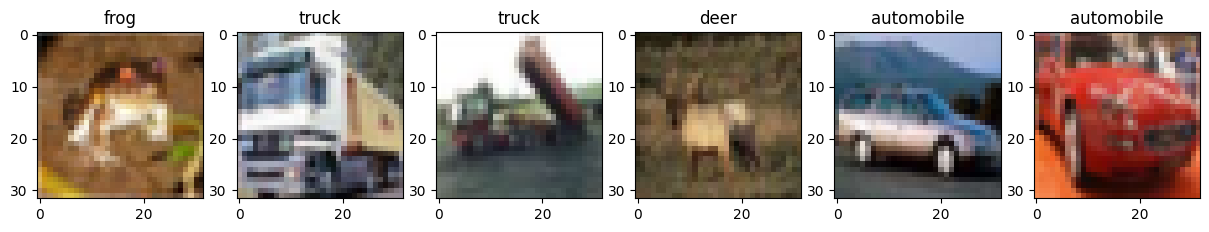

In [3]:
# Let's plot few images to see what they look like
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
for i in range(6):
    plt.subplot(1,6, i+1)
    img = images_train[i]
    label = labels_train[i][0]
    plt.imshow(img)
    plt.title(labels[label])

### (1.2) Image preprocesing

👉 As usual, let's:
- normalize the pixels' intensities between 0 and 1
- turn the `labels_train` and `labels_test` into "one-hot-encoded" targets that we will call respectively `y_train` and `y_test`

In [4]:
### Normalizing pixels' intensities
X_train = images_train / 255.
X_train_small = images_train_small / 255.
X_test = images_test / 255.
X_test_small = images_test_small / 255.

### Encoding the labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(labels_train, 10)
y_train_small = to_categorical(labels_train_small, 10)
y_test = to_categorical(labels_test, 10)
y_test_small = to_categorical(labels_test_small, 10)

## (2) Iterate on your CNN architecture using your small training set




❓ **Question** ❓ Time to shine ⭐️⭐️⭐️ !

1. Define the CNN architecture of your choice in an `initialize_model()` function:
2. Compile your model in a `compile_model()` method:
3. Fit your CNN only on the `small training set` and save the training information in an `history` variable
---
* Feeling lost?
* Do you want to improve your performance ?

<details>
    <summary>🆘 PRO TIPS 🆘</summary>


- Do not forget to add the **`input shape`** of your images to the first layer: it has 3 colors
- **`Start simple, add complexify later `** after several attempts to get better results
- The task is complex: **`Try at least 3 or 4 convolutions`**, you want your **images to go through different magnifying glasses / kernels from different convolutional layers!**
- The Kernel Size does not need to be large for such a small picture resolution!
- Add some **`MaxPooling2D`** (but not too much, otherwise the activation "image" will become too small)
- Keep `padding = "same"` and `stride = (1,1)` to start with.
- Once your model overfits, try to add some **`Dropout Layers` to regularize the network**. A good tip is to **increase the Dropout Rate/Strength as you move closer to the prediction layer** to prevent your CNN from overfitting
- Images are so small in CIFAR10, you can afford to use a larger batch size (32 or 64) to benefit even more from **GPU parallelization**!
</details>

---

In [5]:
X_test_small.shape

(1000, 32, 32, 3)

In [48]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

def initialize_model():
    '''instanciate and return the CNN architecture of your choice with less than 150,000 params'''
    model = models.Sequential()

    model.add(layers.Conv2D(16, (4, 4), strides=(1,1), input_shape=(32, 32, 3), padding='same', activation='relu',))
    model.add(layers.MaxPool2D(pool_size=(1,1)))
    model.add(layers.Dropout(rate=0.2))

    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(1,1)))
    model.add(layers.Dropout(rate=0.3))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(1,1)))
    model.add(layers.Dropout(rate=0.3))

    model.add(layers.Conv2D(64, (2, 2), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(1,1)))
    model.add(layers.Dropout(rate=0.4))

    model.add(layers.Flatten())

    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dropout(rate=0.5))

    model.add(layers.Dense(10, activation='softmax'))

    return model

In [49]:
def compile_model(model):
    '''return a compiled model suited for the CIFAR-10 task'''
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [50]:
model = initialize_model()
model = compile_model(model)

es = EarlyStopping(patience=20, restore_best_weights=True)

history = model.fit(X_train_small, y_train_small,
                    epochs=5000,
                    callbacks=[es],
                    batch_size=32,
                    validation_split=0.3,
                    verbose=1)

Epoch 1/5000
110/110 [==============================] - 5s 17ms/step - loss: 2.3007 - accuracy: 0.1060 - val_loss: 2.2631 - val_accuracy: 0.1493
Epoch 2/5000
110/110 [==============================] - 1s 10ms/step - loss: 2.2858 - accuracy: 0.1280 - val_loss: 2.2730 - val_accuracy: 0.1407
Epoch 3/5000
110/110 [==============================] - 1s 10ms/step - loss: 2.2638 - accuracy: 0.1426 - val_loss: 2.2039 - val_accuracy: 0.1833
Epoch 4/5000
110/110 [==============================] - 1s 10ms/step - loss: 2.2045 - accuracy: 0.1657 - val_loss: 2.1088 - val_accuracy: 0.2267
Epoch 5/5000
110/110 [==============================] - 1s 10ms/step - loss: 2.1931 - accuracy: 0.1677 - val_loss: 2.0951 - val_accuracy: 0.2453
Epoch 6/5000
110/110 [==============================] - 1s 10ms/step - loss: 2.1491 - accuracy: 0.1651 - val_loss: 2.0734 - val_accuracy: 0.2327
Epoch 7/5000
110/110 [==============================] - 1s 10ms/step - loss: 2.1311 - accuracy: 0.1749 - val_loss: 2.0251 - val_ac

❓ **Question: History of your training** ❓

Run the following function on the previous history
_(keep the default arguments, these are intended for future plots in the notebook)_

In [43]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<Axes: title={'center': 'loss'}>, <Axes: title={'center': 'Accuracy'}>)

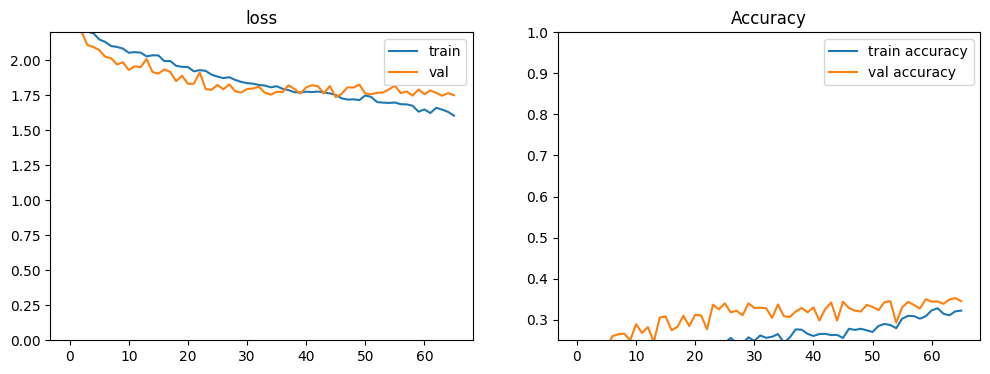

In [51]:
plot_history(history)

❓ **Question: Evaluating your CNN** ❓

* Evaluate your model on the test data and compare it with a baseline accuracy.
* Are you satisfied with this performance?
* Look at the `PRO TIPS` above and iterate a bit if you want to improve your performance!

In [52]:
model.evaluate(X_test_small, y_test_small)

32/32 [==============================] - 0s 10ms/step - loss: 1.7244 - accuracy: 0.3420


[1.7244044542312622, 0.34200000762939453]

## (3) Increase the size of your training data

❓ **Question: train your model on the full dataset** ❓

- Switch to **Colab** if you haven't done it before
- Make sure to use the **GPU acceleration** by clicking on `Runtime` $\rightarrow$ `Change runtime` $\rightarrow$ `GPU`

💡 Training neural networks on images (in each batch) can be parallelized, and this **`parallelization procedure`** can be done on **`GPU`**.

---

In [56]:
model = initialize_model()
model = compile_model(model)

es = EarlyStopping(patience=20, restore_best_weights=True)

history_full = model.fit(X_train, y_train,
                         epochs=5000,
                        callbacks=[es],
                        batch_size=64,
                        validation_split=0.3,
                        verbose=1)

Epoch 1/5000
547/547 [==============================] - 12s 18ms/step - loss: 2.1524 - accuracy: 0.1635 - val_loss: 1.8729 - val_accuracy: 0.2920
Epoch 2/5000
547/547 [==============================] - 8s 15ms/step - loss: 1.9896 - accuracy: 0.2082 - val_loss: 1.8031 - val_accuracy: 0.3183
Epoch 3/5000
547/547 [==============================] - 9s 16ms/step - loss: 1.9511 - accuracy: 0.2219 - val_loss: 1.7439 - val_accuracy: 0.3248
Epoch 4/5000
547/547 [==============================] - 8s 15ms/step - loss: 1.9176 - accuracy: 0.2317 - val_loss: 1.7188 - val_accuracy: 0.3481
Epoch 5/5000
547/547 [==============================] - 9s 16ms/step - loss: 1.8942 - accuracy: 0.2356 - val_loss: 1.6965 - val_accuracy: 0.3705
Epoch 6/5000
547/547 [==============================] - 9s 16ms/step - loss: 1.8771 - accuracy: 0.2440 - val_loss: 1.6640 - val_accuracy: 0.3695
Epoch 7/5000
547/547 [==============================] - 9s 16ms/step - loss: 1.8348 - accuracy: 0.2687 - val_loss: 1.6205 - val_a

In [57]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.1055 - accuracy: 0.6295


[1.1055138111114502, 0.6294999718666077]

You should observe significant performance improvement

Welcome to the Deep Learning paradigm, where big data makes a significant difference.

But what happens if I can access only a limited amount of pictures? Think about biologists studying rare species. What can they do?
* To improve the accuracy of a model without much work, we can **generate new data**.
* The process is called... ⭐️ **`Data Augmentation`** ⭐️ !
</details>

## (4) 🎁📚 Data augmentation

> ℹ️ This section contains questions and the answers are also provided. Read them carefully before moving on to the `Transfer Learning` challenge.

> 👨🏻‍🏫 If you do not have time to do the `Transfer Learning` challenge, don't worry, we can talk about it during the Recap session, we are aware that this unit about Convolutional Neural Networks is quite packed... but also one of the most exciting applications of Deep Learning ❤️

* 👩🏻‍🏫 <b><u>Data Augmentation</u></b>
    * This technique is widely-used and consists of applying little transformations to the input images without changing their labels: ***mirroring***, ***cropping***, ***intensity changes***, etc...
    * The _improved performance_ simply results from the CNN training with more images (the original pictures + the "augmented" ones).
    

* 👉 <b><u>Theoretically:</u></b>
    * (1) We could generate these new images by applying some transformations on copies of the original pictures
    * (2) Train the model on the original images + new images.
    
    
* 🚨  <b><u>Problem:</u></b>
    * Such a procedure requires storing all these images in memory...
    * It can be very intensive, so much so that your computer's RAM cannot hold them all
    
    
* 🦄 <b><u>In Practice:</u></b>
    * When a Neural Network operates a forward/backward propagation, it requires to see only 16 pictures at a time if you chose $ batch size = 16 $ for example. It doesn't need to store all the original images or the augmented images in the RAM.
    * For this reason, we will **augment the data on the fly (batch per batch)**. What does that mean? For every epoch and every batch, during the ***.fit()*** training procedure, we will:
        1. Generate some `augmented data/images`
        2. Fit the model on the images and their augmented versions
        3. Delete the images and their augmented versions from the RAM
        4. Repeat steps 1-2-3
        
* 📚 <a href= "https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator"><b><u>tf/keras/preprocessing/image/ImageDataGenerator</u></b></a>

❓ **Question: using an ImageDataGenerator** ❓

Look at the following code down below 👇
* The general syntax may look strange but don't worry:
    * First, focus on the arguments of the *ImageDataGenerator* which define the augmentation techniques that we are using
    * Then, check the 📚 <a href="https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator">**`ImageDataGenerator`**</a> documentation later


In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = (0.8, 1.2),
    )

datagen.fit(X_train)
datagen

In [59]:
X_augmented_iterator = datagen.flow(X_train, shuffle=False, batch_size=1)
X_augmented_iterator

❗️ Always **visualize the augmented images** in order to double-check whether you can still recognize the labels yourself or not ❗️

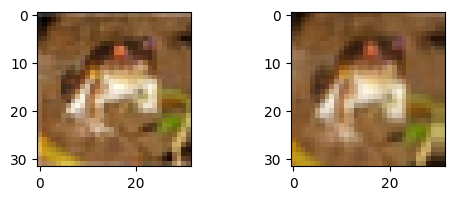

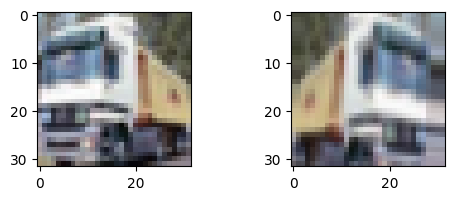

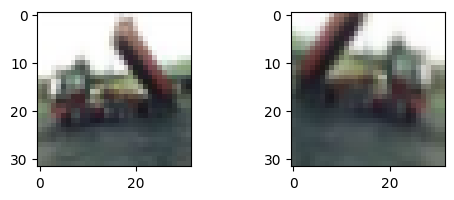

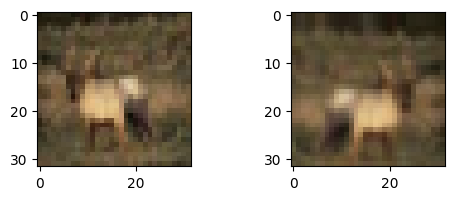

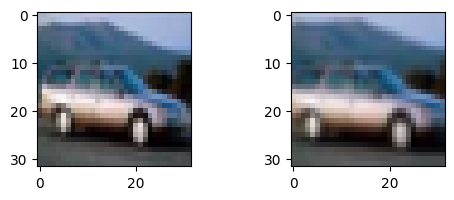

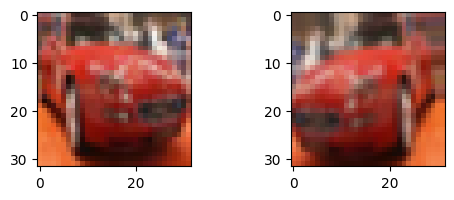

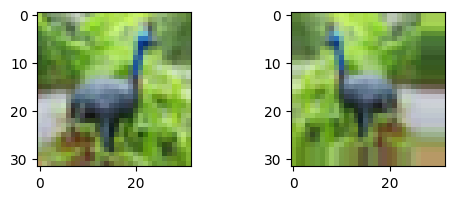

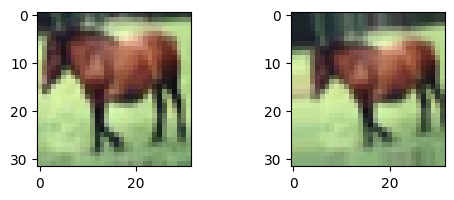

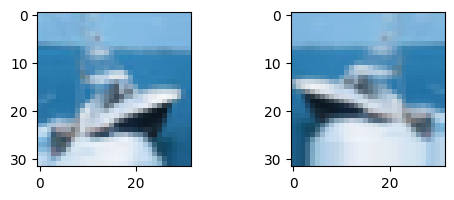

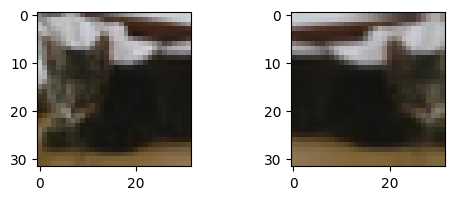

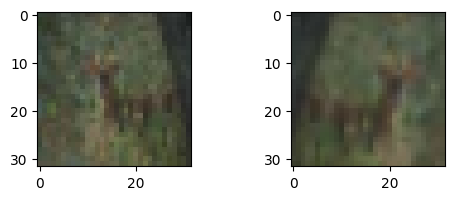

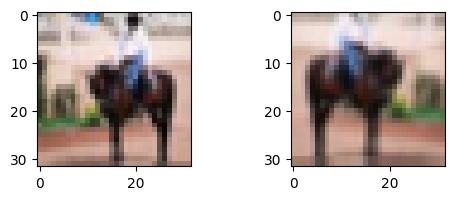

In [60]:
import numpy as np

for i, (raw_image, augmented_image) in enumerate(zip(X_train, X_augmented_iterator)):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
    ax1.imshow(raw_image)
    ax2.imshow(augmented_image[0])
    plt.show()

    if i > 10:
        break

❗ **Remarks** ❗

* Each image from **`X_augmented_iterator`** is an ***augmented image*** of one image located in the original `X_train` image dataset
* This augmentation process is done once per epoch.
* During one epoch, the model will:
    1. *create the augmented version* of each picture from `X_train`,
    2. for each image of `X_train`, *the model will randomly pick either the original version in `X_train` or its augmented version in `X_augmented_iterator`*
    3. and the model will be *fitted on the combination of some original images + some augmented images*

---



❓ **Question: what is the validation set when we have augmented images** ❓

* Previously, we used the `validation_split` argument to let the model separate the training set into a Train/Validation split when fitting the model for each epoch.
* It is not possible to use this kind of Train/Val Split here as **using an image in the training set and its transformation in the validation set is considered `data leakage`** !.
* Therefore, we have to define the **`validation_data`** manually with the following commands: take time to understand the cell down below:👇


In [62]:
from tensorflow.keras.callbacks import EarlyStopping

# The model
model_aug = initialize_model()
model_aug = compile_model(model_aug)

# The data generator
X_tr = X_train[:40000]
y_tr = y_train[:40000]
X_val = X_train[40000:]
y_val = y_train[40000:]
train_flow = datagen.flow(X_tr, y_tr, batch_size = 64)

# The early stopping criterion
es = EarlyStopping(patience = 3)

# The fit
history_aug = model_aug.fit(train_flow,
                        epochs = 50,
                        callbacks = [es],
                        validation_data = (X_val, y_val))


Epoch 1/50
625/625 [==============================] - 33s 48ms/step - loss: 2.2656 - accuracy: 0.1333 - val_loss: 2.0938 - val_accuracy: 0.2496
Epoch 2/50
625/625 [==============================] - 29s 46ms/step - loss: 2.0903 - accuracy: 0.1981 - val_loss: 1.9030 - val_accuracy: 0.2744
Epoch 3/50
625/625 [==============================] - 30s 47ms/step - loss: 2.0059 - accuracy: 0.2211 - val_loss: 1.8086 - val_accuracy: 0.2929
Epoch 4/50
625/625 [==============================] - 29s 47ms/step - loss: 1.9675 - accuracy: 0.2297 - val_loss: 1.7921 - val_accuracy: 0.2987
Epoch 5/50
625/625 [==============================] - 31s 49ms/step - loss: 1.9482 - accuracy: 0.2364 - val_loss: 1.7438 - val_accuracy: 0.3114
Epoch 6/50
625/625 [==============================] - 30s 48ms/step - loss: 1.9268 - accuracy: 0.2411 - val_loss: 1.7512 - val_accuracy: 0.3220
Epoch 7/50
625/625 [==============================] - 29s 47ms/step - loss: 1.9170 - accuracy: 0.2438 - val_loss: 1.6805 - val_accuracy:

🚨 The training can be quite long here...

👉 Feel free to move on to the next exercise and come back to this notebook later to finish the last questions

❓ **Question: How did the model with an augmented dataset perform?** ❓

Let's plot the previous and current run histories. What do you think of the data augmentation?

(<Axes: title={'center': 'loss'}>, <Axes: title={'center': 'Accuracy'}>)

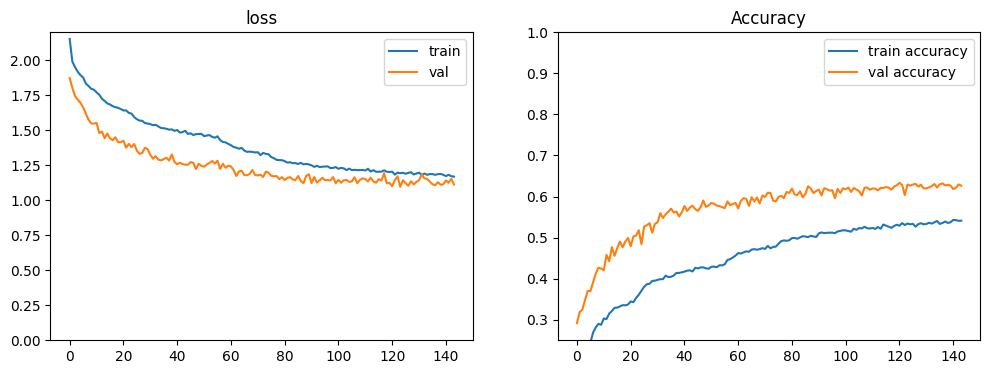

In [63]:
plot_history(history_full)

(<Axes: title={'center': 'loss'}>, <Axes: title={'center': 'Accuracy'}>)

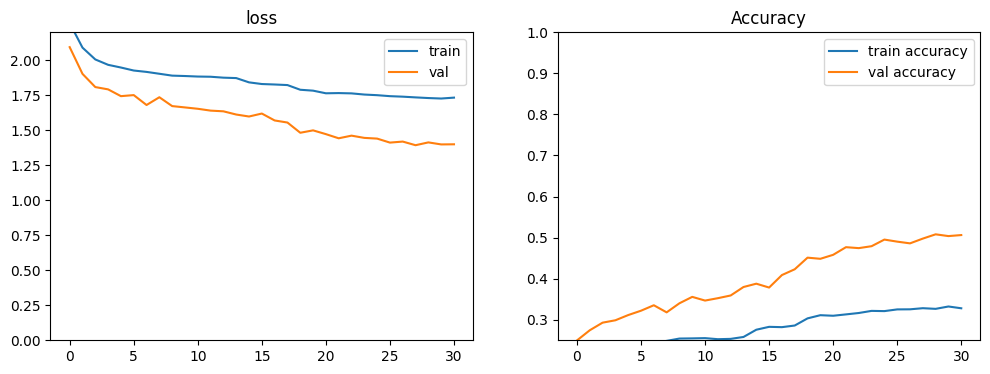

In [64]:
plot_history(history_aug)

In [65]:
model_aug.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.4029 - accuracy: 0.5046


[1.4029380083084106, 0.5045999884605408]

🥡 <b><u>Some takeaways from Data Augmentation:</u></b>

* Data augmentation may not improve your performance easily...

* Here it even decreased the performance!

* Its impact strongly depends on:
    * the model architecture you used
    * the learning rate,
    * the type of augmentation chosen, etc...

* Image classification is an art that requires months and years of practice to master!

🚨 **Don't spend too much time trying to finetune your model for the moment!  You have other interesting challenges to investigate!** 🚨

📚 [Here is a good example of a solution for future reference](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/).<br>
They managed to reach an accuracy level of approx. 80%!

---

🏁 **Congratulations** 🏁

1. Download this notebook from your `Google Drive` or directly from `Google Colab`
2. Drag-and-drop it from your `Downloads` folder to your local challenge folder  


💾 Don't forget to push your code

3. Follow the usual procedure on your terminal, inside the challenge folder:
      * *git add cifar_classification.ipynb*
      * *git commit -m "I am the god of CNNs"*
      * *git push origin master*

*Hint*: To find where this Colab notebook has been saved, click on `File` $\rightarrow$ `Locate in Drive`.

🚀 It is time to move on to the **Transfer Learning** challenge!